In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from imblearn.over_sampling import SMOTE

import warnings

warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('loan_data.csv')

df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
df.isna().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


### approvement ratio

In [7]:
x=df['credit.policy'].value_counts()
value=x.values
label=x.index.map({0:'UnApproved',1:'Approved'})

fig=px.pie(names=label,values=value,title='Approvment Ratio')

fig.update_traces(textinfo='percent+label')

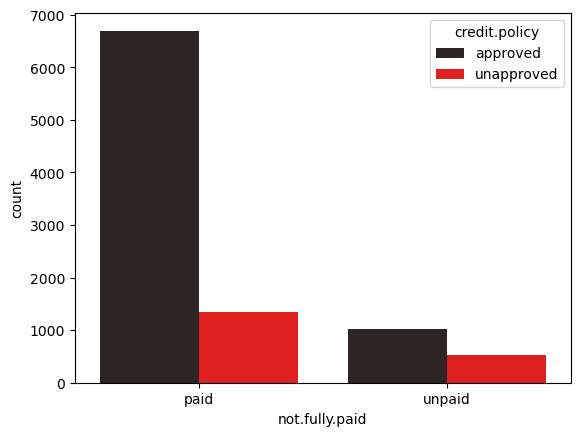

In [8]:
x=df.groupby('not.fully.paid')['credit.policy'].value_counts().reset_index()
x['not.fully.paid']=x['not.fully.paid'].map({0:'paid',1:'unpaid'})
x['credit.policy']=x['credit.policy'].map({0:'unapproved',1:'approved'})
sns.barplot(x,x='not.fully.paid',y='count',hue='credit.policy',color='red')

plt.show()

In [9]:
df['purpose'].value_counts()

purpose
debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: count, dtype: int64

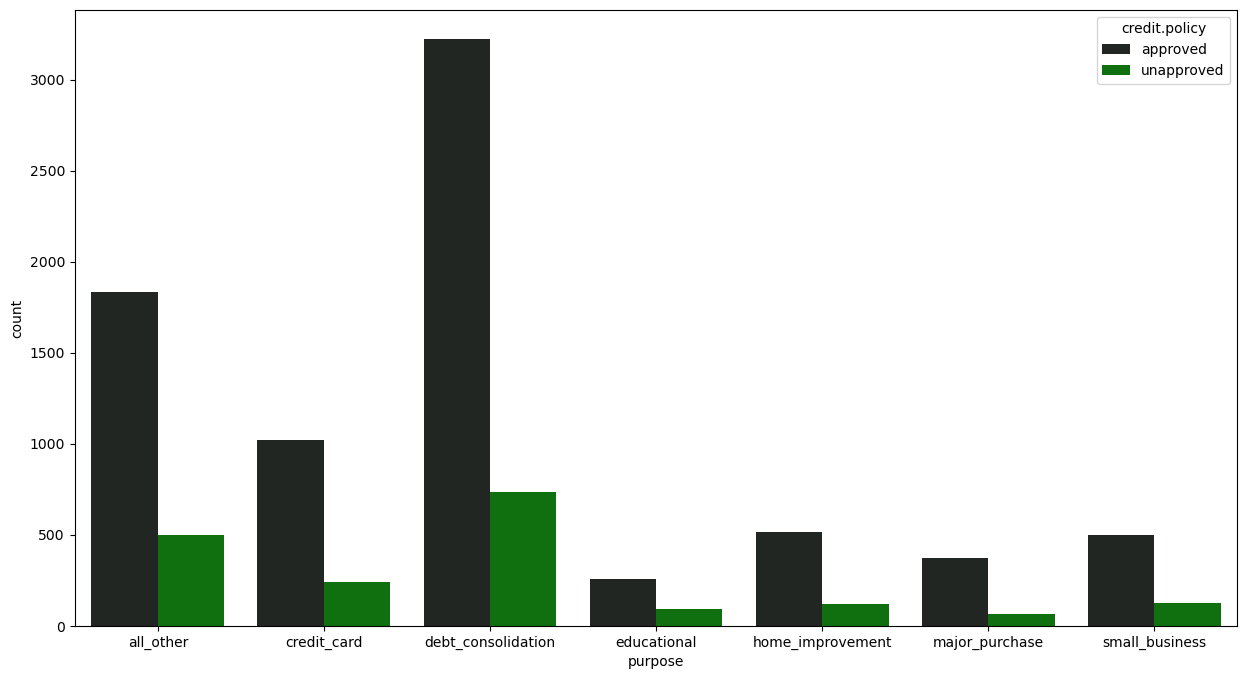

In [10]:
x=df.groupby('purpose')['credit.policy'].value_counts().reset_index()
x['credit.policy']=x['credit.policy'].map({0:'unapproved',1:'approved'})
plt.figure(figsize=(15,8))
sns.barplot(x,x='purpose',y='count',hue='credit.policy',color='green')
plt.show()

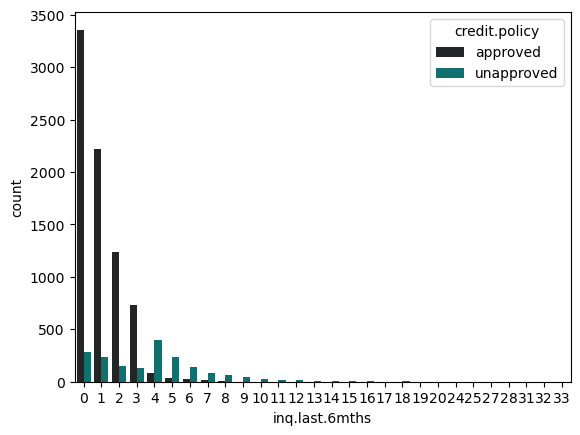

In [11]:
df['inq.last.6mths'].value_counts()

x=df.groupby('inq.last.6mths')['credit.policy'].value_counts().reset_index()
x['credit.policy']=x['credit.policy'].map({0:'unapproved',1:'approved'})

sns.barplot(x,x='inq.last.6mths',y='count',hue='credit.policy',color='teal')
plt.show()

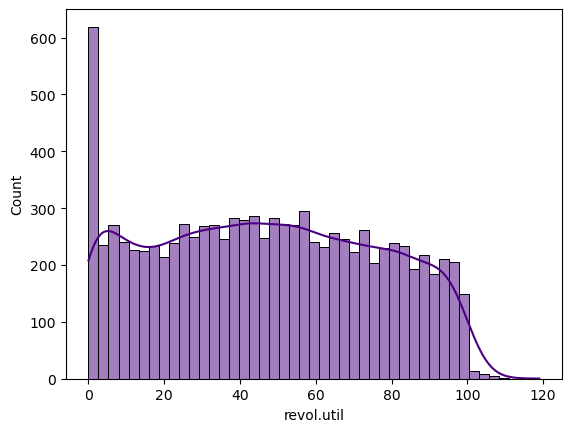

In [12]:
sns.histplot(df['revol.util'],bins=45,kde=True,color='indigo')

plt.show()

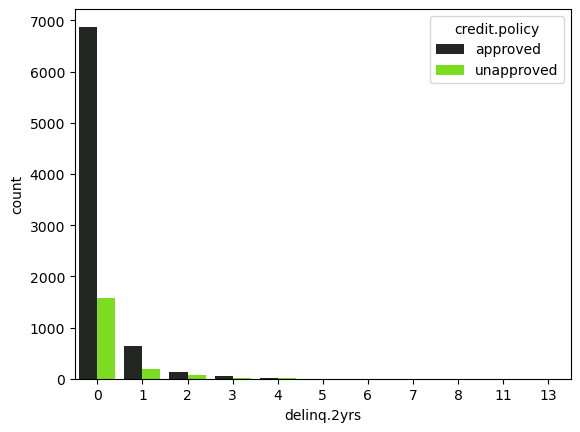

In [13]:
df['delinq.2yrs'].value_counts()

x=df.groupby('delinq.2yrs')['credit.policy'].value_counts().reset_index()
x['credit.policy']=x['credit.policy'].map({0:'unapproved',1:'approved'})

sns.barplot(x,x='delinq.2yrs',y='count',hue='credit.policy',color='lawngreen')
plt.show()

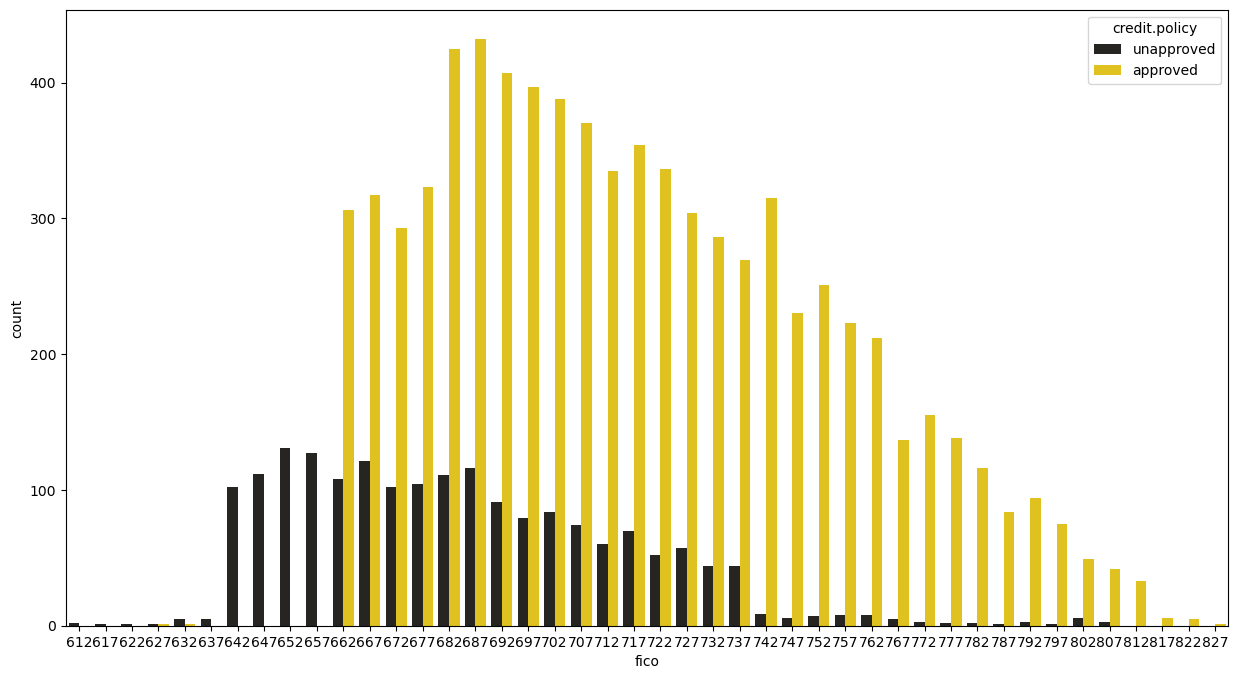

In [14]:
df['fico']

x=df.groupby('credit.policy')['fico'].value_counts().reset_index()
x['credit.policy']=x['credit.policy'].map({0:'unapproved',1:'approved'})

plt.figure(figsize=(15,8))
sns.barplot(x,x='fico',y='count',hue='credit.policy',color='gold')

plt.show()

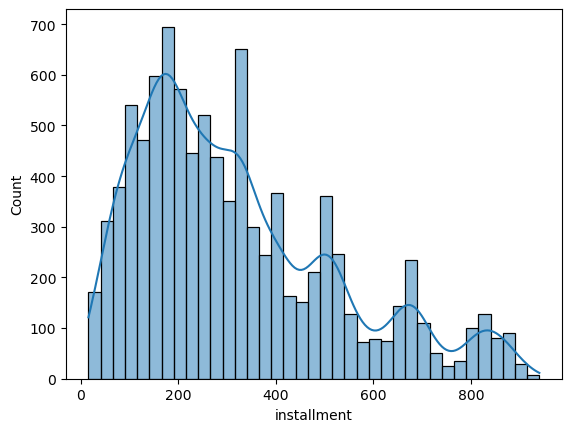

In [15]:
sns.histplot(df['installment'],kde=True)
plt.show()

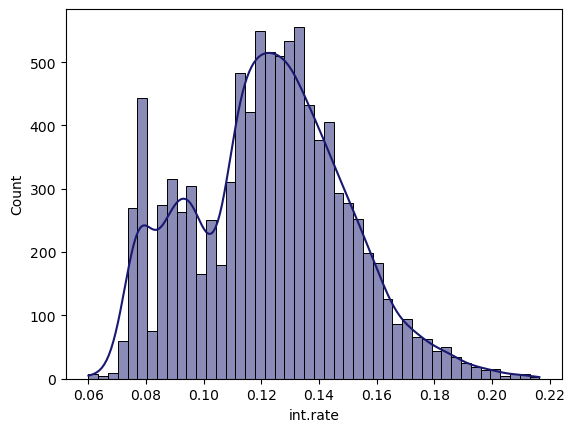

In [16]:
df['int.rate']

sns.histplot(df['int.rate'],kde=True,color='midnightblue')
plt.show()

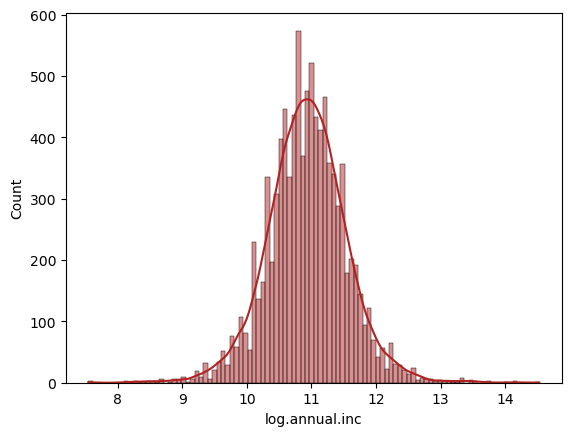

In [17]:
df['log.annual.inc']

sns.histplot(df['log.annual.inc'],kde=True,color='firebrick')
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
#from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.preprocessing import OneHotEncoder # no order
from sklearn.preprocessing import LabelEncoder  # order

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#from sklearn.metrics import accuracy_score, recall_score,precision_score, f1_score
#from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [19]:
le=LabelEncoder()

for col in df.select_dtypes(include='O').columns:
    df[col]=le.fit_transform(df[col])
    

In [20]:
x=df.drop('credit.policy',axis=1)
y=df['credit.policy']

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y)

In [22]:
scale=StandardScaler()

x_train=scale.fit_transform(x_train)
x_test=scale.transform(x_test)

In [23]:
smote=SMOTE(random_state=42)
x_smote,y_smote=smote.fit_resample(x_train,y_train)

In [24]:
model1=LogisticRegression(C=0.01, solver='liblinear')
model2=RandomForestClassifier(max_depth=20, max_features='log2')
model3=SVC(C=10)
model4=KNeighborsClassifier(p=1, weights='distance')
model5=GaussianNB()
model6=GradientBoostingClassifier(learning_rate=0.05, max_depth=7, min_samples_leaf=4,
                            min_samples_split=5, n_estimators=300,
                            subsample=0.8)
model7=DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5)

models=[model1,model2,model3,model4,model5,model6,model7]

In [25]:
param_grids = {
    "LogisticRegression": {
        "C": [0.01, 0.1, 1, 10, 100],
        "solver": ["liblinear", "lbfgs"],
        "penalty": ["l2"]   
    },
    
    "SVC": {
        "C": [0.1, 1, 10],
        "kernel": ["linear", "rbf", "poly"],
        "gamma": ["scale", "auto"]
    },
    
    "KNeighborsClassifier": {
        "n_neighbors": [3, 5, 7, 9, 11, 15],
        "weights": ["uniform", "distance"],
        "p": [1, 2]   
    },
    
    "DecisionTreeClassifier": {
        "criterion": ["gini", "entropy"],
        "max_depth": [None, 5, 10, 20],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    },
    
    "GaussianNB": {
        "var_smoothing": [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
    },
    
    "RandomForestClassifier": {
        "n_estimators": [100, 300, 500],
        "max_depth": [None, 5, 10, 20],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "max_features": ["sqrt", "log2"]
    },
    
    "GradientBoostingClassifier": {
        "n_estimators": [100, 300, 500],
        "learning_rate": [0.01, 0.05, 0.1],
        "max_depth": [3, 5, 7],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "subsample": [0.8, 1.0]
    }
}


In [26]:
'''model_grid={"LogisticRegression":model1,
            'RandomForestClassifier':model2,
            'SVC':model3,
            'KNeighborsClassifier':model4,
            'GaussianNB':model5,
            'GradientBoostingClassifier':model6,
            'DecisionTreeClassifier':model7}

bestmodels={}

for name,model in model_grid.items():
    print(f'tuning {name} :  ')
    grid=GridSearchCV(estimator=model,
                 param_grid=param_grids[name],
                 scoring='f1',
                 cv=5,
                 n_jobs=-1,
                 verbose=2)
    grid.fit(x_train,y_train)

    print(f'best parameters {name}: {grid.best_params_} ')
    bestmodels[name]=grid.best_estimator_'''

'model_grid={"LogisticRegression":model1,\n            \'RandomForestClassifier\':model2,\n            \'SVC\':model3,\n            \'KNeighborsClassifier\':model4,\n            \'GaussianNB\':model5,\n            \'GradientBoostingClassifier\':model6,\n            \'DecisionTreeClassifier\':model7}\n\nbestmodels={}\n\nfor name,model in model_grid.items():\n    print(f\'tuning {name} :  \')\n    grid=GridSearchCV(estimator=model,\n                 param_grid=param_grids[name],\n                 scoring=\'f1\',\n                 cv=5,\n                 n_jobs=-1,\n                 verbose=2)\n    grid.fit(x_train,y_train)\n\n    print(f\'best parameters {name}: {grid.best_params_} \')\n    bestmodels[name]=grid.best_estimator_'

In [27]:
#lr=bestmodels['LogisticRegression']
#rf=bestmodels['RandomForestClassifier']
#svc=bestmodels['SVC']
#knn=bestmodels['KNeighborsClassifier']
#gnb=bestmodels['GaussianNB']
#gbc=bestmodels['GradientBoostingClassifier']
#dtc=bestmodels['DecisionTreeClassifier']
#models=[lr,rf,svc,knn,gnb,gbc,dtc]

 {'LogisticRegression': LogisticRegression(C=0.01, solver='liblinear'),
 'RandomForestClassifier': RandomForestClassifier(max_depth=20, max_features='log2'),
 'SVC': SVC(C=10),
 'KNeighborsClassifier': KNeighborsClassifier(p=1, weights='distance'),
 'GaussianNB': GaussianNB(),
 'GradientBoostingClassifier': GradientBoostingClassifier(learning_rate=0.05, max_depth=7, min_samples_leaf=4,
                            min_samples_split=5, n_estimators=300,
                            subsample=0.8),
 'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5)}

In [28]:
#bestmodels

In [29]:
def cal(model):
    model.fit(x_smote,y_smote)
    pred=model.predict(x_test)
    score=classification_report(y_test,pred)
    print(model)
    print(score)
    sns.heatmap(confusion_matrix(pred,y_test),fmt='.2f',annot=True)
    plt.show()


LogisticRegression(C=0.01, solver='liblinear')
              precision    recall  f1-score   support

           0       0.58      0.86      0.69       374
           1       0.96      0.85      0.90      1542

    accuracy                           0.85      1916
   macro avg       0.77      0.85      0.80      1916
weighted avg       0.89      0.85      0.86      1916



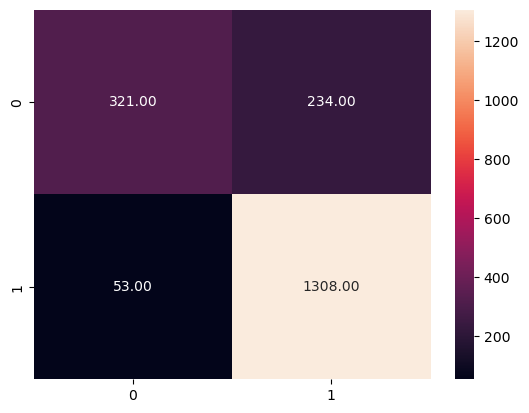

RandomForestClassifier(max_depth=20, max_features='log2')
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       374
           1       0.99      1.00      0.99      1542

    accuracy                           0.99      1916
   macro avg       0.99      0.98      0.98      1916
weighted avg       0.99      0.99      0.99      1916



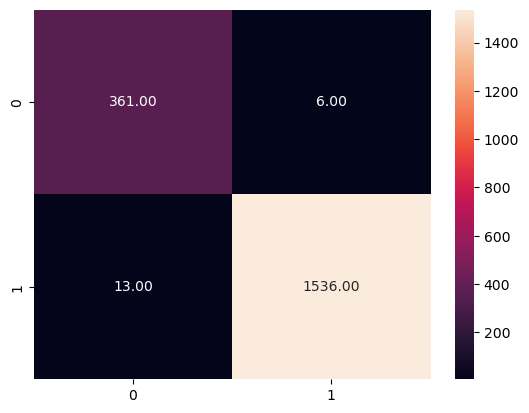

SVC(C=10)
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       374
           1       0.97      0.95      0.96      1542

    accuracy                           0.94      1916
   macro avg       0.89      0.92      0.91      1916
weighted avg       0.94      0.94      0.94      1916



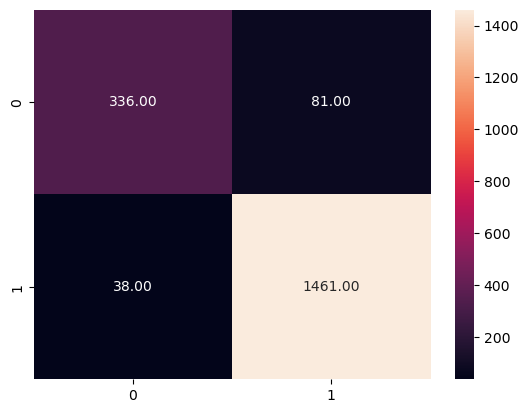

KNeighborsClassifier(p=1, weights='distance')
              precision    recall  f1-score   support

           0       0.69      0.84      0.76       374
           1       0.96      0.91      0.93      1542

    accuracy                           0.89      1916
   macro avg       0.82      0.87      0.84      1916
weighted avg       0.91      0.89      0.90      1916



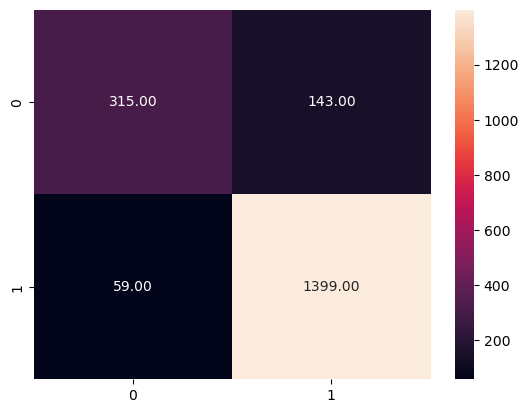

GaussianNB()
              precision    recall  f1-score   support

           0       0.60      0.77      0.68       374
           1       0.94      0.88      0.91      1542

    accuracy                           0.86      1916
   macro avg       0.77      0.82      0.79      1916
weighted avg       0.87      0.86      0.86      1916



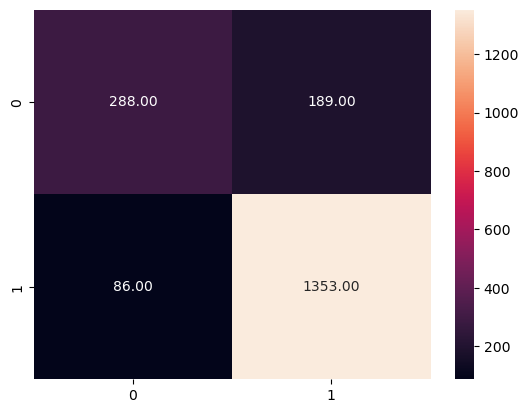

GradientBoostingClassifier(learning_rate=0.05, max_depth=7, min_samples_leaf=4,
                           min_samples_split=5, n_estimators=300,
                           subsample=0.8)
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       374
           1       1.00      1.00      1.00      1542

    accuracy                           1.00      1916
   macro avg       0.99      0.99      0.99      1916
weighted avg       1.00      1.00      1.00      1916



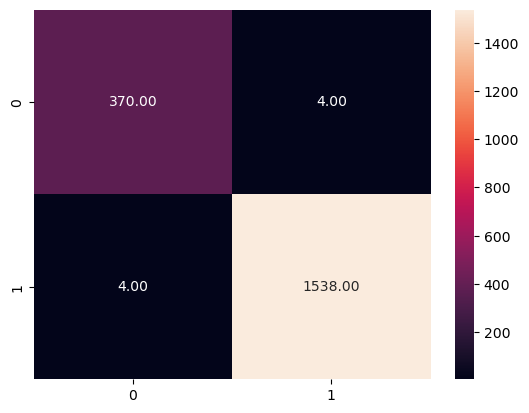

DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5)
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       374
           1       0.99      0.99      0.99      1542

    accuracy                           0.99      1916
   macro avg       0.97      0.98      0.98      1916
weighted avg       0.99      0.99      0.99      1916



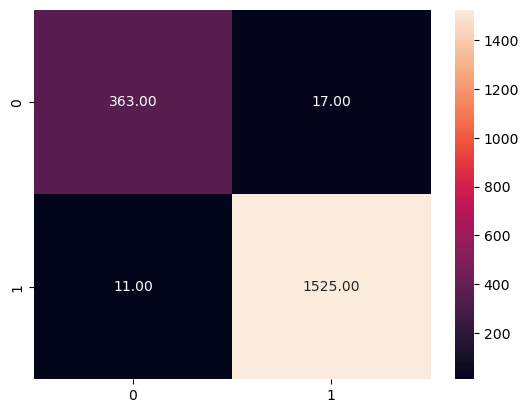

In [30]:
for i in models:
    cal(i)